In [71]:


from PIL import Image

import os
from os.path import split,join, isdir ,exists
os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
from loguru import logger
import torch
import numpy as np
import skimage
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from PIL import Image

from utils import *
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率


from utils.entity.bsds_rind_gt_loader import * 
from utils.entity.bsds_rind_qualitative_drawer import * 

# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)


In [2]:
no_ea2_loss = QualitativeDrawer('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/networks/need2release/wo_containt_loss_0','no_EA2')
our_drawer = QualitativeDrawer('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/networks/need2release/full_version_0','full version')
gt_loader = GtLoader()

In [3]:

def find_worse_image(drawer):

    ans = {}
    for idx in range(drawer.__len__()):
        r,i,n,d,name=drawer.get_F_quantitatives(idx)
        
        ans[name]=np.array([r,i,n,d]).mean()

    return  sorted(ans.items(), key =lambda k : k[1])


        
worse_list = find_worse_image(no_ea2_loss) 

In [80]:


def merge_rind(rind):
    return np.max( np.concatenate([x[...,None] for x in rind],axis=-1),axis=-1)


def plot_generic_rind(image, generic_edge, rind_edge,threshold=0.5):

    
    

    rind_image = image.copy()

    rind_image[rind_edge > threshold*255 ] = (250,10,0)

    generic_image = image.copy()

    generic_image[generic_edge > threshold*255 ] = (0,250,50)


    return generic_image,rind_image
    




threshold = 0.5
worse_name  = [x[0] for x in worse_list][:20]

for name in ['102062']:
    __,generic_edge,reflectance_edge,illumination_edge,normal_edge,depth_edge = gt_loader.getitem(name)
    
    image = gt_loader.get_image(name)[:,:,::-1]
    

    

    ans = no_ea2_loss.getitem(name)
    generic_image,rind_image = plot_generic_rind(image,merge_rind(ans[1:]),ans[0])


    with_loss_ans =our_drawer.getitem(name)
    with_loss_generic_image,with_loss_rind_image = plot_generic_rind(image,merge_rind(with_loss_ans[1:]),with_loss_ans[0])

    # plot_list = [generic_image,rind_image,image]
    # show_imgs(plot_list,[0] * len(plot_list))

    

In [81]:


RINDE_COLOR = [
    (10,139,226),
    (239,123,83),
    (186,214,120),
    (75, 186, 238),
    (177,111,168)
    ]



def draw_edge(image,edge,color,times=1.2):

    ans = image.copy()
    edge = dilation(edge,times)/255==1

    ans[edge] = color

    return ans

    
image,generic_edge,reflectance_edge,illumination_edge,normal_edge,depth_edge   = gt_loader.getitem(name)

image = image[:,:,::-1]


g = draw_edge(image,generic_edge==1,color=RINDE_COLOR[0],times=1.5)
r = draw_edge(image,reflectance_edge==1,color=RINDE_COLOR[1],times=1.5)
# i = draw_edge(image,illumination_edge==1,color=RINDE_COLOR[2])
n = draw_edge(image,normal_edge==1,color=RINDE_COLOR[3],times=1.5)
d = draw_edge(image,depth_edge==1,color=RINDE_COLOR[4],times=1.5)


image_list = [g,r,i,n,d]
# image_list = [g,r,n,d]

# show_imgs(image_list,[0]*len(image_list))

# show_imgs([g],[0],img_name = 'generic.png')
# show_imgs([r],[0],img_name = 'reflectance.png')
# show_imgs([i],[0],img_name = 'illumination.png')
# show_imgs([n],[0],img_name = 'normal.png')
# show_imgs([d],[0],img_name = 'depth.png')







In [75]:
merged = np.array([r,i,n,d])
merged.shape



(4, 321, 481, 3)

In [82]:

def draw_on_img(image,edge,color,times =1.2):
    edge = dilation(edge,times)/255==1

    image[edge] = color




 
threshold=0.9
prediced_illumination_edge = ans[2].copy()>threshold*255


draw_on_img(image,  prediced_illumination_edge |  (illumination_edge==1) ,color=RINDE_COLOR[2])
# draw_on_img(image,generic_edge==1,color=RINDE_COLOR[0],times=1.5)
draw_on_img(image,reflectance_edge==1,color=RINDE_COLOR[1],times=1.5)
draw_on_img(image,normal_edge==1,color=RINDE_COLOR[3],times=1.5)
draw_on_img(image,depth_edge==1,color=RINDE_COLOR[4],times=1.5)




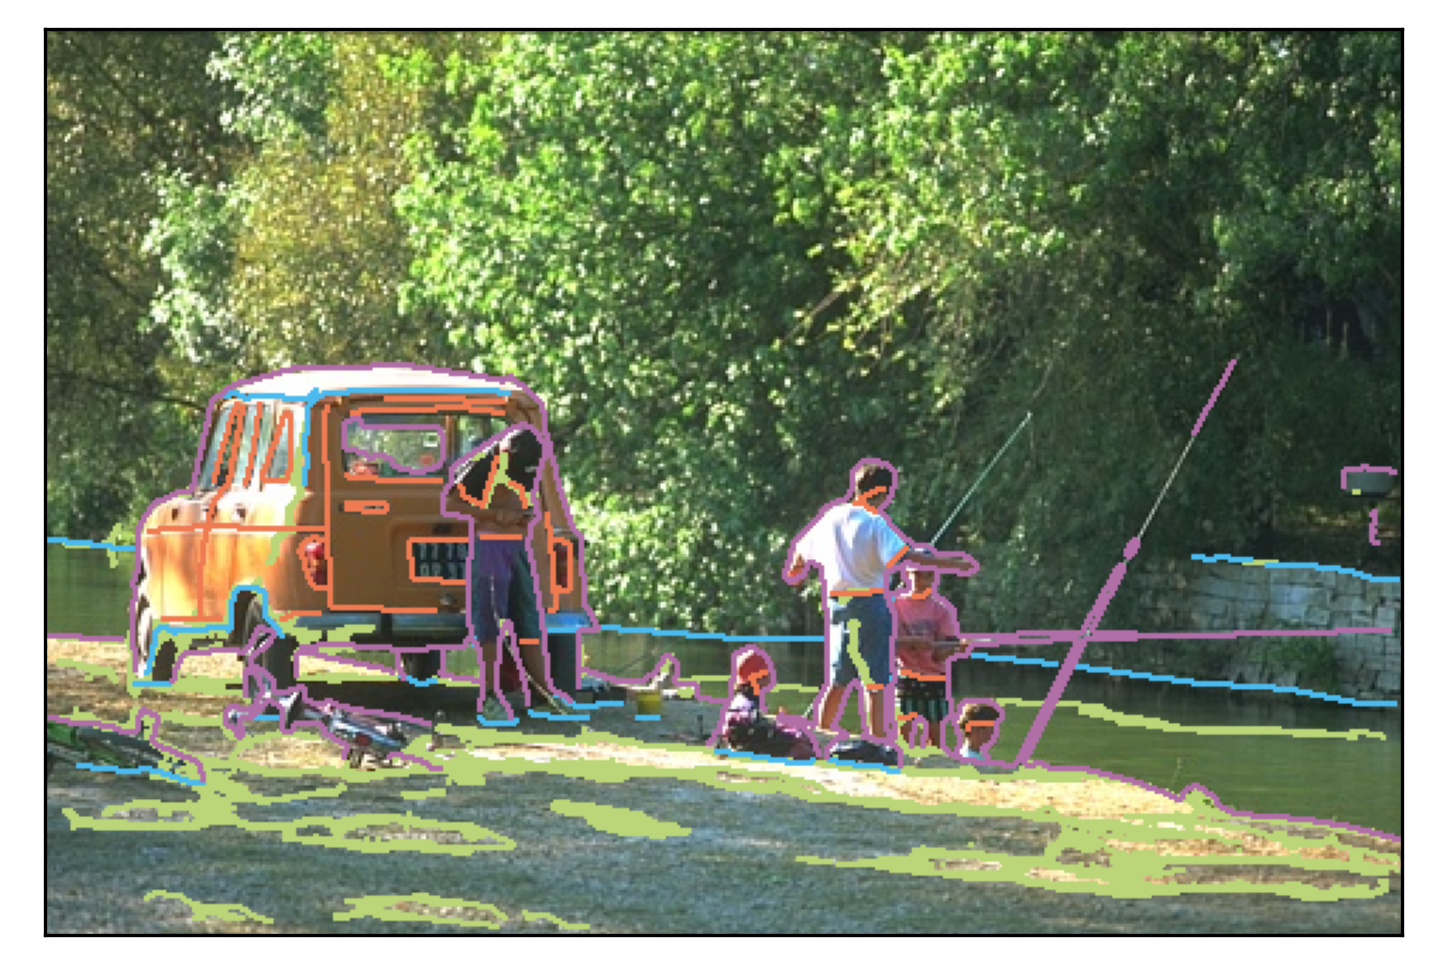

In [84]:
show_imgs([image],[0],img_name='rind.png')